First I had to get familiarized with the data. I tried to grasp an understanding on what data we are dealing with. Having read the Data Dictionary file, I used the python code below to get a brief understanding on what the below data is. First We had to install the below packages

In [4]:
%pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

# Load datasets
loan_data = pd.read_csv('data\loan.csv')
payment_data = pd.read_csv('data\payment.csv')
clarity_data = pd.read_csv('data\clarity_underwriting_variables.csv')

#Loading data heads
print(loan_data.head())
print(payment_data.head())
print(clarity_data.head())

<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\c'
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\2870160047.py:4: SyntaxWarning: invalid escape sequence '\l'
  loan_data = pd.read_csv('data\loan.csv')
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\2870160047.py:5: SyntaxWarning: invalid escape sequence '\p'
  payment_data = pd.read_csv('data\payment.csv')
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\2870160047.py:6: SyntaxWarning: invalid escape sequence '\c'
  clarity_data = pd.read_csv('data\clarity_underwriting_variables.csv')


          loanId                          anon_ssn payFrequency    apr  \
0  LL-I-07399092  beff4989be82aab4a5b47679216942fd            B  360.0   
1  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
2  LL-I-10707532  3c174ae9e2505a5f9ddbff9843281845            B  590.0   
3  LL-I-02272596  9be6f443bb97db7e95fa0c281d34da91            B  360.0   
4  LL-I-09542882  63b5494f60b5c19c827c7b068443752c            B  590.0   

              applicationDate  originated              originatedDate  \
0  2016-02-23T17:29:01.940000       False                         NaN   
1  2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
2  2016-08-01T13:51:14.709000       False                         NaN   
3  2015-08-06T23:58:08.880000       False                         NaN   
4  2016-06-05T22:31:34.304000       False                         NaN   

   nPaidOff  approved  isFunded             loanStatus  loanAmount  \
0       0.0     False         0  Withdrawn App

C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\2870160047.py:6: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  clarity_data = pd.read_csv('data\clarity_underwriting_variables.csv')


After loading our initial dataset, we need to know what our main objective is. Based on the available data, who are the applicants that are high risk, and who are the applicants that are likely to repay the loans taken. 

We first have to familiarize ourselves with the data.

In [6]:
#Loading data infos
print(loan_data.info())
print(payment_data.info())
print(clarity_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            577426 non-null  object 
 1   anon_ssn                          577682 non-null  object 
 2   payFrequency                      576409 non-null  object 
 3   apr                               573760 non-null  float64
 4   applicationDate                   577682 non-null  object 
 5   originated                        577682 non-null  bool   
 6   originatedDate                    46044 non-null   object 
 7   nPaidOff                          577658 non-null  float64
 8   approved                          577682 non-null  bool   
 9   isFunded                          577682 non-null  int64  
 10  loanStatus                        577291 non-null  object 
 11  loanAmount                        575432 non-null  f

Finding if there are any null cells to being cleansing of data

In [7]:
# Checking for Null entries
print(loan_data.isnull().sum())
print(payment_data.isnull().sum())
print(clarity_data.isnull().sum())


loanId                                 256
anon_ssn                                 0
payFrequency                          1273
apr                                   3922
applicationDate                          0
originated                               0
originatedDate                      531638
nPaidOff                                24
approved                                 0
isFunded                                 0
loanStatus                             391
loanAmount                            2250
originallyScheduledPaymentAmount         0
state                                  132
leadType                                 0
leadCost                                 0
fpStatus                            525959
clarityFraudId                      219989
hasCF                                    0
dtype: int64
loanId                    0
installmentIndex          0
isCollection              0
paymentDate               0
principal                 0
fees                      0
pa

Although there are null cells, upon further reading the data, null cells are remained null because of certain information. Eg.: if originated is true, only is there an originated date. 

Next I want to find if there are any outliers in the data using loan amount. Since some loans that are too high are rare cases, they are usually considered higher-risk applicants

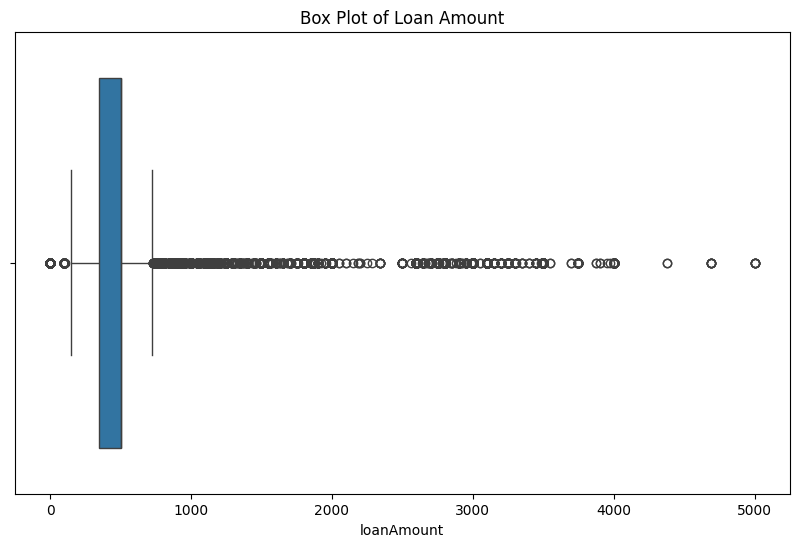

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for loanAmount
plt.figure(figsize=(10, 6))
sns.boxplot(x=loan_data['loanAmount'])
plt.title('Box Plot of Loan Amount')
plt.show()

From the box graph above, we can see that most of the people who have applied for a loan lies within the 700 - 3500 range. Anything above are considered high loans.

Next we should see how many people have actually paid off their loans using a scatter plot.

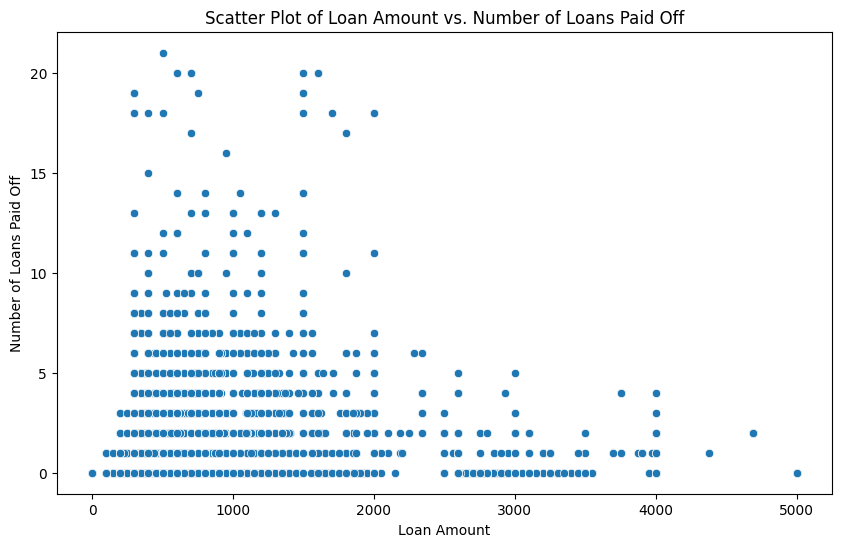

In [9]:
# Scatter plot between 'loanAmount' and 'nPaidOff'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loanAmount', y='nPaidOff', data=loan_data)
plt.title('Scatter Plot of Loan Amount vs. Number of Loans Paid Off')
plt.xlabel('Loan Amount')
plt.ylabel('Number of Loans Paid Off')
plt.show()

After this step, I realized that I was working towards the wrong direction. I wanted to find out what were the difference between the clients whos loans were approved and not approved. Firstly, I'll sort the data into clients whose loans have been originated and approved and are funded.

In [10]:
# Filter where 'originated' is True and 'approved' is True
originated_and_approved = loan_data[(loan_data['originated'] == True) & (loan_data['approved'] == True)]

# Filter where 'isFunded' is 1 from the already filtered data
funded_loans = originated_and_approved[originated_and_approved['isFunded'] == 1]

# Extract 'loanId' and 'nPaidOff' values
loanId_nPaidOff = funded_loans[['loanId', 'nPaidOff']]

# Display the resulting DataFrame
print(funded_loans)

               loanId                          anon_ssn payFrequency    apr  \
1       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
15      LL-I-12263369  accf40708233e8b7d05fcb89d5a9c081            B  475.0   
33      LL-I-17826953  7529d29c9d943cc55bc71a85d9c6b7a3            W  645.0   
47      LL-I-16519347  bc9fa73468acf18cb968a3a6a3c4697c            S  490.0   
54      LL-I-11506719  10cefd11d41612b032fd9cd2debe32dc            B  590.0   
...               ...                               ...          ...    ...   
577564  LL-I-12367915  55392b05f72f8c3e32e5157612406ba8            B  565.0   
577590  LL-I-15280684  73690518af906288434b2a0cfd972fe0            M  645.0   
577617  LL-I-09897110  0538f828b4a0b44502ead5a8033ee779            B  449.0   
577653  LL-I-14178923  d9a63e9e15b862fcaaf3653c52e1f16c            B  625.0   
577662  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   

                   applicationDate  originated     

From the above data, we know that out of 577682 entries, only 38982 clients were approved. 

We can check the below on what are the most common types of payment frequency.

In [11]:
# Count the occurrences of each payment frequency
pay_frequency_counts = funded_loans['payFrequency'].value_counts()

# Display the counts for each payment frequency
print(pay_frequency_counts)

payFrequency
B    22797
W    10248
M     2880
S     2628
I      429
Name: count, dtype: int64


Since we have the data of pay frequency of the accepted loans, we can see the contrast with the rejected loans 

In [12]:
# Filter where 'originated' is False
not_originated_loans = loan_data[loan_data['originated'] == False]

# Count the occurrences of each payment frequency for loans not originated
pay_frequency_not_originated_counts = not_originated_loans['payFrequency'].value_counts()

# Display the counts for each payment frequency for loans not originated
print(pay_frequency_not_originated_counts)

payFrequency
B    289896
W    124935
M     55637
I     33331
S     26604
Name: count, dtype: int64


As we can see from the above, the difference of payFrequency doesn't differentiate much from people who got approved. This means we should check somewhere else aside from this. 

In [13]:
# Count the number of people in each leadType for funded loans
funded_loans_leadtype_counts = funded_loans['leadType'].value_counts()

# Count the number of people in each leadType for not originated loans
not_originated_loans_leadtype_counts = not_originated_loans['leadType'].value_counts()

# Display the results
print("LeadType Counts for Funded Loans:")
print(funded_loans_leadtype_counts)
print("\nLeadType Counts for Not Originated Loans:")
print(not_originated_loans_leadtype_counts)

LeadType Counts for Funded Loans:
leadType
bvMandatory      16569
lead             11572
organic           7598
rc_returning      1843
prescreen         1307
california          49
express             16
lionpay             10
instant-offer        9
repeat               9
Name: count, dtype: int64

LeadType Counts for Not Originated Loans:
leadType
bvMandatory      454871
lead              58063
organic           14919
prescreen          3129
california          429
rc_returning        217
repeat               15
lionpay              15
instant-offer        13
express               5
Name: count, dtype: int64


We can also tell that the leadTypes have no impact on fundedLoans.

Now we want to see if other variables affect the outcome of a loan status. We'll plot graphs for the apr, loanAmount and leadCost

C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\3065746904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funded_loans['Group'] = 'Funded'
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\3065746904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_originated_loans['Group'] = 'Not Originated'
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\3065746904.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` a

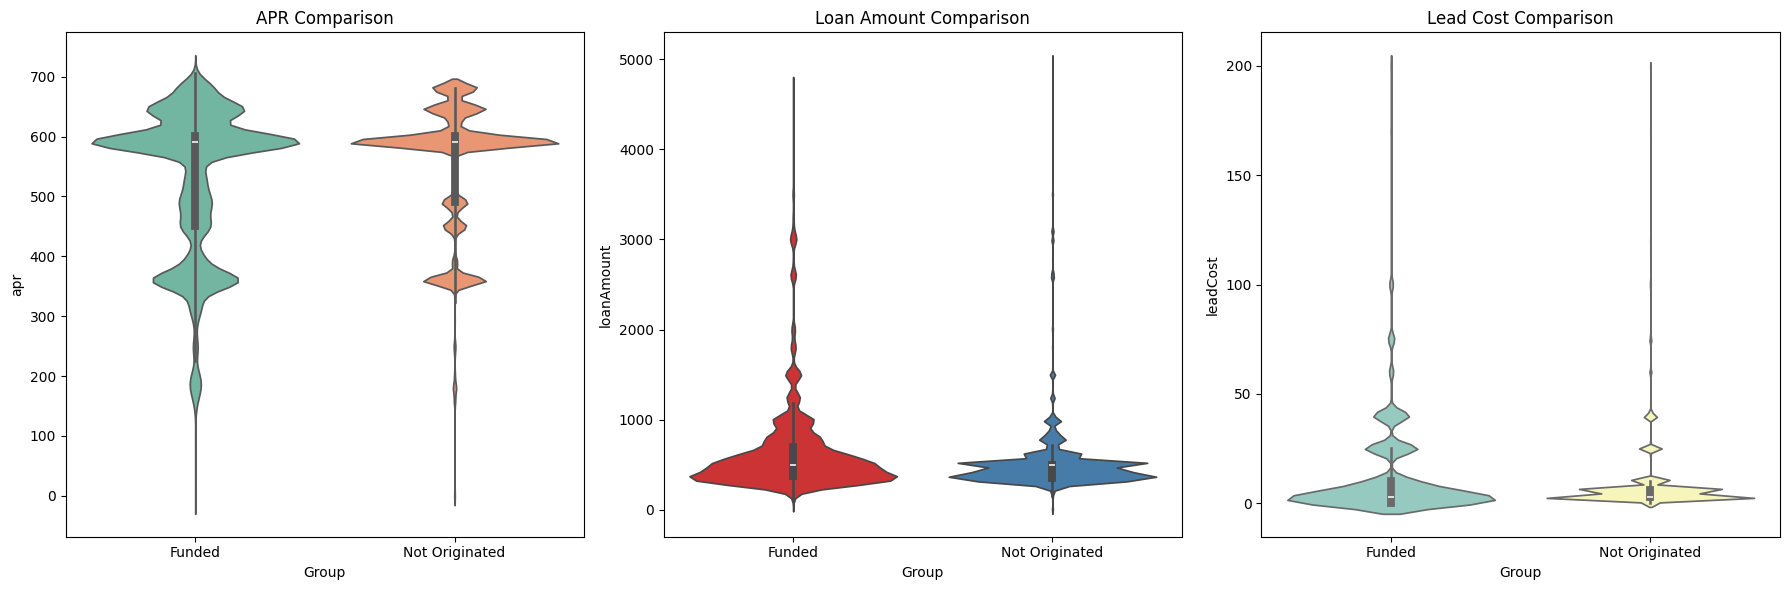

In [14]:
# Grouping the two
funded_loans['Group'] = 'Funded'
not_originated_loans['Group'] = 'Not Originated'

# Concatenate the two DataFrames while selecting only the relevant columns
combined_data = pd.concat([
    funded_loans[['apr', 'loanAmount', 'leadCost', 'Group']],
    not_originated_loans[['apr', 'loanAmount', 'leadCost', 'Group']]
])

# Plotting the violin plots
plt.figure(figsize=(18, 6))

# Violin plot for APR
plt.subplot(1, 3, 1)
sns.violinplot(x='Group', y='apr', data=combined_data, palette="Set2")
plt.title('APR Comparison')

# Violin plot for Loan Amount
plt.subplot(1, 3, 2)
sns.violinplot(x='Group', y='loanAmount', data=combined_data, palette="Set1")
plt.title('Loan Amount Comparison')

# Violin plot for Lead Cost
plt.subplot(1, 3, 3)
sns.violinplot(x='Group', y='leadCost', data=combined_data, palette="Set3")
plt.title('Lead Cost Comparison')

plt.tight_layout()
plt.show()


After comparing the data of the funded and non-originated poeple from the loan.csv file, it is hard to find any difference between the groups of people. So instead of focusing on it, I read through the other csv files and explainations one more time. 

There seems to be a connection in the clarity_underwriting_variables file and the approval rate. So I decided to add a column to see which of the people are approved in the clarity_underwriting_variables file by matching the ID with the loan.csv id.

In [15]:
# Load the datasets
clarity_data = pd.read_csv('data\clarity_underwriting_variables.csv')
loan_data = pd.read_csv('data\loan.csv')

# Merge the datasets on the specified columns using clarity_data as a base
merged_data = pd.merge(clarity_data, 
                       loan_data[['clarityFraudId', 'originated', 'approved', 'isFunded']], 
                       left_on='underwritingid', 
                       right_on='clarityFraudId', 
                       how='left')

# Drop the 'clarityFraudId' column to avoid duplication
merged_data.drop('clarityFraudId', axis=1, inplace=True)

# Save the merged dataset to a new CSV file
merged_data.to_csv('merged_dataset.csv', index=False)

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\l'
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\57576250.py:2: SyntaxWarning: invalid escape sequence '\c'
  clarity_data = pd.read_csv('data\clarity_underwriting_variables.csv')
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\57576250.py:3: SyntaxWarning: invalid escape sequence '\l'
  loan_data = pd.read_csv('data\loan.csv')
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\57576250.py:2: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  clarity_data = pd.read_csv('data\clarity_underwriting_variables.csv')


Now that we've merged the datasets, there are a few datasets which are not actually included in the loan.csv file. We should start by cleaning these rows out so that we have accurate data on which of the following have been funded and which have been rejected.

In [17]:
df = pd.read_csv('data\merged_dataset.csv')

# Remove rows where the 'originated' column is blank
df = df[df['originated'].notna()]

# Save the cleaned dataset
df.to_csv('data\merged_dataset_cleaned.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\3502735961.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('data\merged_dataset.csv')
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\3502735961.py:7: SyntaxWarning: invalid escape sequence '\m'
  df.to_csv('data\merged_dataset_cleaned.csv', index=False)
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\3502735961.py:1: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data\merged_dataset.csv')


Now that we have a cleaned dataset, wew should find how many cases are funded and how many are not originated. After finding out how many cases are not originated, we should find what the originated datasets have in common. 

In [20]:
# Load the cleaned dataset
cleaned_merged_data = pd.read_csv('data\merged_dataset_cleaned.csv')

# Convert 'originated' to boolean
cleaned_merged_data['originated'] = cleaned_merged_data['originated'].astype(bool)

# Split the dataset into two groups
originated_true = cleaned_merged_data[cleaned_merged_data['originated'] == True]
originated_false = cleaned_merged_data[cleaned_merged_data['originated'] == False]

# Columns of interest
columns_of_interest = [
    ".underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inquiryageyoungerthanssnissuedate",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresscautious",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddressnonresidential",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresshighrisk",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.ssnreportedmorefrequentlyforanother",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbytradeopenlt90days",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inputssnissuedatecannotbeverified",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresscautious",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.morethan3inquiriesinthelast30days",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddressnonresidential",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedpriortossnissuedate"
]

# Calculate means for both groups
originated_true_means = originated_true[columns_of_interest].mean()
originated_false_means = originated_false[columns_of_interest].mean()

# Combine the means into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Originated = TRUE': originated_true_means,
    'Originated = FALSE': originated_false_means
})

comparison_df

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\2338304818.py:2: SyntaxWarning: invalid escape sequence '\m'
  cleaned_merged_data = pd.read_csv('data\merged_dataset_cleaned.csv')
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\2338304818.py:2: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_merged_data = pd.read_csv('data\merged_dataset_cleaned.csv')


,Originated = TRUE,Originated = FALSE
.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress,0.920585,0.915975
.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryageyoungerthanssnissuedate,0.002775,0.001556
.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresscautious,0.000062,0.000259
.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddressnonresidential,0.144033,0.159492
.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresshighrisk,0.010143,0.014523
.underwritingdataclarity.clearfraud.clearfraudindicator.ssnreportedmorefrequentlyforanother,0.010759,0.005965
.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbytradeopenlt90days,0.026112,0.025934
.underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid,0.0,0.0
.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnissuedatecannotbeverified,0.001634,0.002075
.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresscautious,0.000247,0.000519


There doesn't seem to be much of a difference between the two sets of data above, so instead, we'll narrow one end of the data so it has to be funded in order to make it to the true group. And we'll change the data to a percentage based, so it is easier to understand

In [21]:
# Load the cleaned dataset
cleaned_merged_data = pd.read_csv('data\merged_dataset_cleaned.csv')

# Convert 'originated' to boolean
cleaned_merged_data['originated'] = cleaned_merged_data['originated'].astype(bool)

# Split the dataset into two groups
funded_true = cleaned_merged_data[(cleaned_merged_data['originated'] == True) & 
                                      (cleaned_merged_data['approved'] == True) & 
                                      (cleaned_merged_data['isFunded'] == 1)]
originated_false = cleaned_merged_data[cleaned_merged_data['originated'] == False]

# Columns of interest
columns_of_interest = [
    ".underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inquiryageyoungerthanssnissuedate",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresscautious",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddressnonresidential",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresshighrisk",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.ssnreportedmorefrequentlyforanother",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbytradeopenlt90days",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inputssnissuedatecannotbeverified",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresscautious",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.morethan3inquiriesinthelast30days",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddressnonresidential",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedpriortossnissuedate"
]

# Calculate means for both groups, made in percentage
originated_true_means = funded_true[columns_of_interest].mean() * 100
originated_false_means = originated_false[columns_of_interest].mean() * 100

# Combine the means into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Originated = TRUE': originated_true_means,
    'Originated = FALSE': originated_false_means
})

comparison_df

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\249660817.py:2: SyntaxWarning: invalid escape sequence '\m'
  cleaned_merged_data = pd.read_csv('data\merged_dataset_cleaned.csv')
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\249660817.py:2: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_merged_data = pd.read_csv('data\merged_dataset_cleaned.csv')


,Originated = TRUE,Originated = FALSE
.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress,92.042556,91.59751
.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryageyoungerthanssnissuedate,0.276862,0.155602
.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresscautious,0.006222,0.025934
.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddressnonresidential,14.421701,15.94917
.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresshighrisk,1.004791,1.452282
.underwritingdataclarity.clearfraud.clearfraudindicator.ssnreportedmorefrequentlyforanother,1.082561,0.596473
.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbytradeopenlt90days,2.616189,2.593361
.underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid,0.0,0.0
.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnissuedatecannotbeverified,0.164873,0.207469
.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresscautious,0.024886,0.051867


There still isn't much we can verify with the data above, aside from onfileaddresscautious tends to have mcuh more rejected cases. We should look into the other categories of data instead. 

What we are looking for is something high value in originated = false and low value in originated = true so that we know that these clients are sure to reject. 

In [23]:
additional_columns_of_interest = [
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inputssnrecordedasdeceased",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresshighrisk",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inquirycurrentaddressnotonfile",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnissuedatecannotbeverified",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.highprobabilityssnbelongstoanother",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnrecordedasdeceased",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbynewtradeonly",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedbeforeage18",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithstate"
]

# Calculate means for the specified group in percentage
originated_true_additional_means = funded_true[additional_columns_of_interest].mean() * 100
originated_false_additional_means = originated_false[additional_columns_of_interest].mean() * 100

# Combine the means into a single DataFrame for comparison of the additional indicators
comparison_df_additional = pd.DataFrame({
    'Originated=TRUE, Approved=TRUE, isFunded=1': originated_true_additional_means,
    'Originated=FALSE': originated_false_additional_means
})

comparison_df_additional

,"Originated=TRUE, Approved=TRUE, isFunded=1",Originated=FALSE
.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnrecordedasdeceased,0.0,0.0
.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresshighrisk,1.182107,0.596473
.underwritingdataclarity.clearfraud.clearfraudindicator.inquirycurrentaddressnotonfile,10.934486,8.298755
.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnissuedatecannotbeverified,0.0,0.0
.underwritingdataclarity.clearfraud.clearfraudindicator.highprobabilityssnbelongstoanother,0.846139,0.414938
.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount,724.938594,540.69466
.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnrecordedasdeceased,0.0,0.0
.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbynewtradeonly,7.313507,6.716805
.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedbeforeage18,1.004791,0.778008
.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithstate,8.363797,7.322897


After considering that there are not much patterns we can find from here, I assessed the payments.csv file. Here I am grouping two groups of people, people who have successfully paid, or checked, their payments and people who haven't. Perhaps maybe by filtering these two groups we can find a trend on which are the people who have made their payments and who are those who have not.

In [24]:
payments_data = pd.read_csv('data\payment.csv')

# Determine the percentage of 'Checked' payments per loanId
checked_payments = payments_data.groupby('loanId')['paymentStatus'].apply(lambda x: (x == 'Checked').mean())

# Identify loanIds with more than 90% 'Checked' status
loan_ids_checked_over_90 = checked_payments[checked_payments > 0.9].index

# Filter the dataset into two groups based on the identified loanIds
payment_no_issues = payments_data[payments_data['loanId'].isin(loan_ids_checked_over_90)]
payment_issues = payments_data[~payments_data['loanId'].isin(loan_ids_checked_over_90)]

# Save the filtered data into two separate files
payment_no_issues.to_csv('payment_no_issues.csv', index=False)
payment_issues.to_csv('payment_issues.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\4003905262.py:1: SyntaxWarning: invalid escape sequence '\p'
  payments_data = pd.read_csv('data\payment.csv')


Next, wel'll calculate the amount of unique ids for each. 

In [26]:

payment_issues = pd.read_csv('data\payment_issues.csv')
# Calculate and print the number of unique loanIds in 'payment_issues.csv'
unique_loanIds_issues = payment_issues['loanId'].nunique()
print(f"Unique loanIds in payment_issues.csv: {unique_loanIds_issues}")

payment_no_issues = pd.read_csv('data\payment_no_issues.csv')
# Calculate and print the number of unique loanIds in 'payment_no_issues.csv'
unique_loanIds_no_issues = payment_no_issues['loanId'].nunique()
print(f"Unique loanIds in payment_no_issues.csv: {unique_loanIds_no_issues}")

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\1130161903.py:1: SyntaxWarning: invalid escape sequence '\p'
  payment_issues = pd.read_csv('data\payment_issues.csv')
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\1130161903.py:6: SyntaxWarning: invalid escape sequence '\p'
  payment_no_issues = pd.read_csv('data\payment_no_issues.csv')


Unique loanIds in payment_issues.csv: 35472
Unique loanIds in payment_no_issues.csv: 4480


As we can see here, we can find a clear difference in numbers in payments with issues and payments with no issues. 

We can now join the loanIDs from payees that have issues and no issues with the clarityfraudID, to gain more insights about how no issue payees are like. 

First lets seperate loan.csv into two files.

In [28]:
payment_no_issues = pd.read_csv('data\payment_no_issues.csv')
payment_issues = pd.read_csv('data\payment_issues.csv')

# Get unique loanIds from each payment file
no_issues_loanIds = payment_no_issues['loanId'].unique()
issues_loanIds = payment_issues['loanId'].unique()

# Load the loan.csv file
loan_data = pd.read_csv('data\loan.csv')

# Split the loan data into two subsets based on loanId lists
loan_no_issue = loan_data[loan_data['loanId'].isin(no_issues_loanIds)]
loan_issue = loan_data[loan_data['loanId'].isin(issues_loanIds)]

loan_no_issue.to_csv('loan_no_issue.csv', index=False)
loan_issue.to_csv('loan_issue.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\l'
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\2413516590.py:1: SyntaxWarning: invalid escape sequence '\p'
  payment_no_issues = pd.read_csv('data\payment_no_issues.csv')
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\2413516590.py:2: SyntaxWarning: invalid escape sequence '\p'
  payment_issues = pd.read_csv('data\payment_issues.csv')
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\2413516590.py:9: SyntaxWarning: invalid escape sequence '\l'
  loan_data = pd.read_csv('data\loan.csv')


Before checking anything from clarity_underwriting_variables, lets see if the data from loan_issue.csv differ from loan_no_issue.csv. 

We should first see the difference in loan status and state. loanStatus because we should be able to see majority of it being paid off with no issues in the no_issue file. And each states economical status might also have an effect on the clients. 

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\847805709.py:2: SyntaxWarning: invalid escape sequence '\l'
  loan_no_issue = pd.read_csv('data\loan_no_issue.csv')


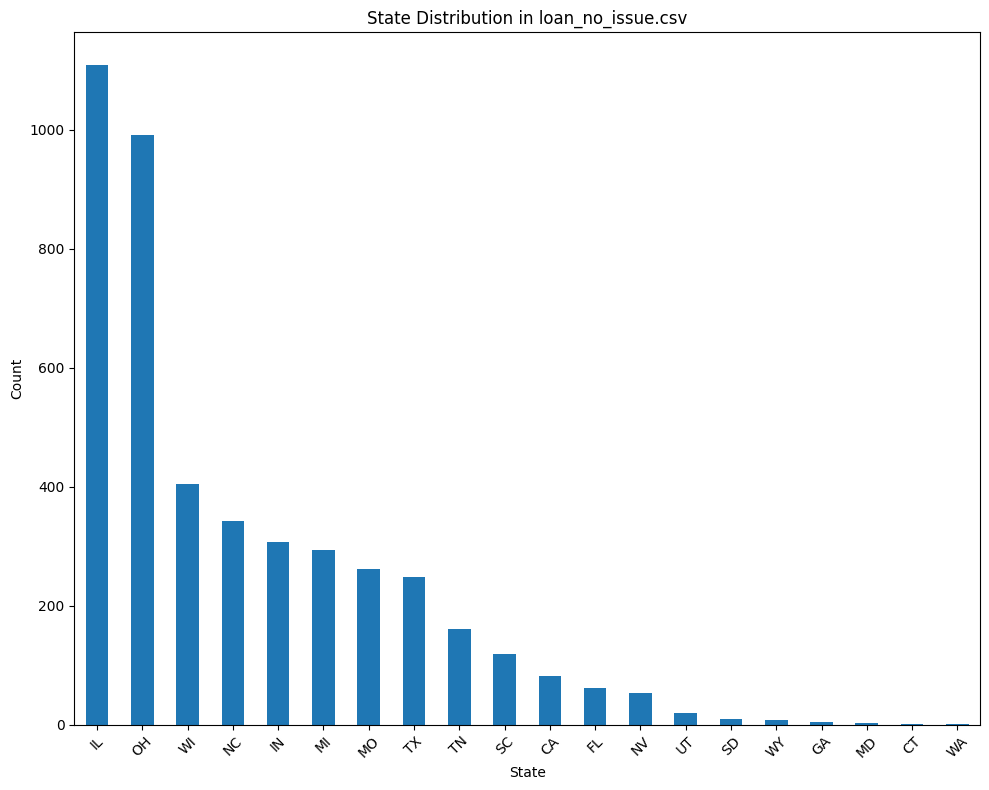

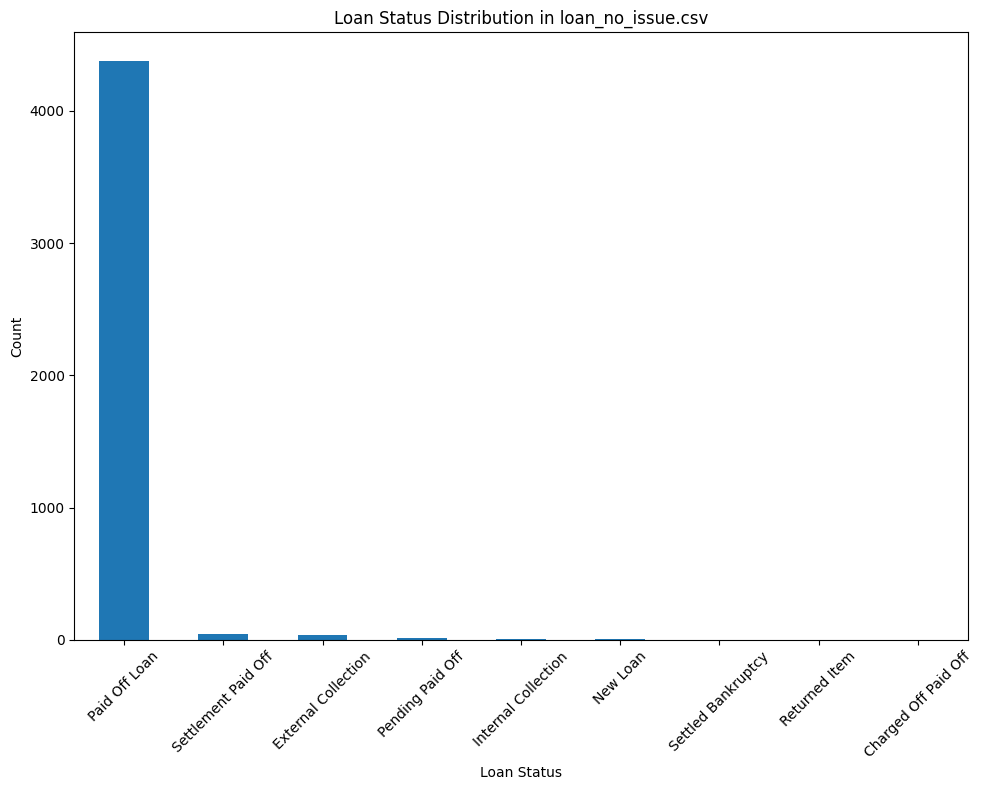

In [31]:
# For No Issues
loan_no_issue = pd.read_csv('data\loan_no_issue.csv')

# Prepare data for plotting
state_counts_no_issue = loan_no_issue['state'].value_counts()
loan_status_counts_no_issue = loan_no_issue['loanStatus'].value_counts()

# Plotting State Distribution
plt.figure(figsize=(10, 8))
state_counts_no_issue.plot(kind='bar')
plt.title('State Distribution in loan_no_issue.csv')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Loan Status Distribution
plt.figure(figsize=(10, 8))
loan_status_counts_no_issue.plot(kind='bar')
plt.title('Loan Status Distribution in loan_no_issue.csv')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\1009191368.py:2: SyntaxWarning: invalid escape sequence '\l'
  loan_issue = pd.read_csv('data\loan_issue.csv')


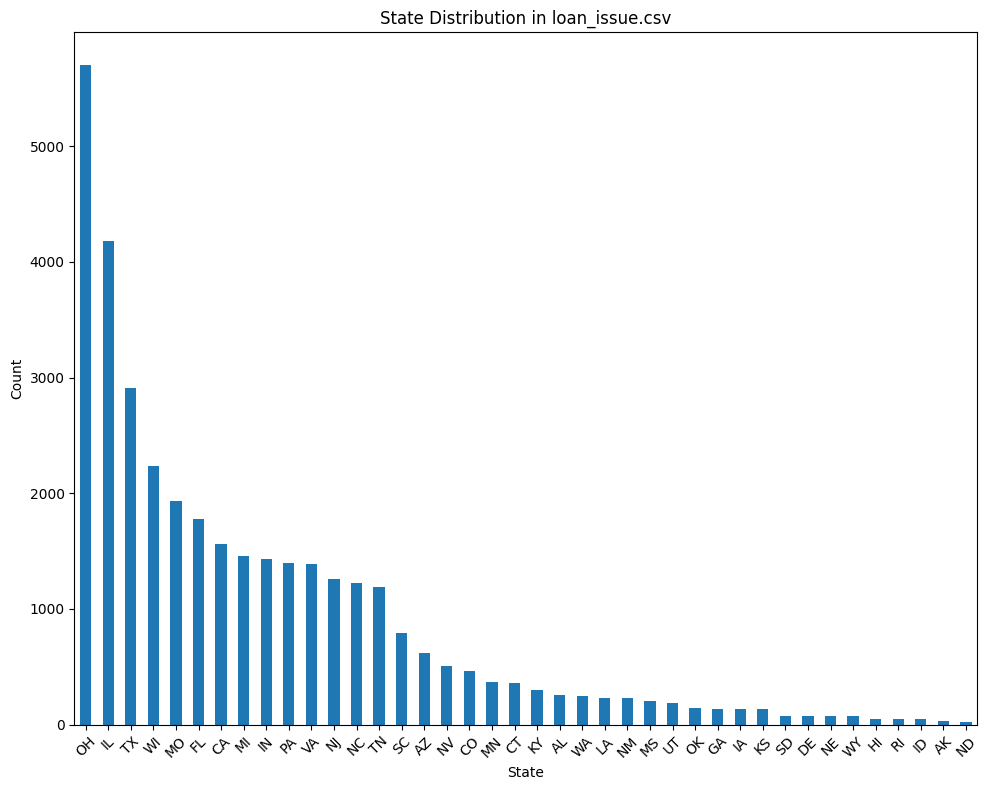

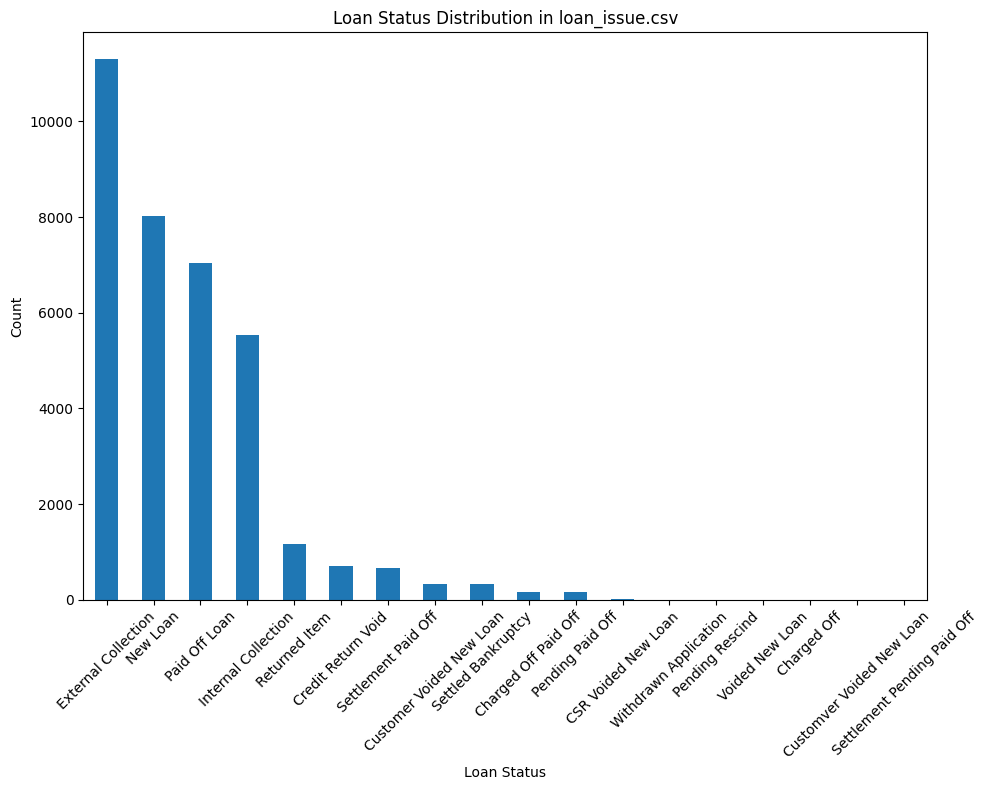

In [33]:
#For issues
loan_issue = pd.read_csv('data\loan_issue.csv')

# Prepare data for plotting
state_counts_issue = loan_issue['state'].value_counts()
loan_status_counts_issue = loan_issue['loanStatus'].value_counts()

# Plotting State Distribution
plt.figure(figsize=(10, 8))
state_counts_issue.plot(kind='bar')
plt.title('State Distribution in loan_issue.csv')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Loan Status Distribution
plt.figure(figsize=(10, 8))
loan_status_counts_issue.plot(kind='bar')
plt.title('Loan Status Distribution in loan_issue.csv')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
# Calculate the percentage of each state in loan_no_issue
state_perc_no_issue = loan_no_issue['state'].value_counts(normalize=True) * 100

# Calculate the percentage of each state in loan_issue
state_perc_issue = loan_issue['state'].value_counts(normalize=True) * 100

print("No issues:")
for state, perc in state_perc_no_issue.items():
    print(f"{state} - {perc:.2f}%")
print("\n" + "-"*30 + "\n")
print("Issues:")
for state, perc in state_perc_issue.items():
    print(f"{state} - {perc:.2f}%")

No issues:
IL - 24.73%
OH - 22.12%
WI - 9.04%
NC - 7.66%
IN - 6.85%
MI - 6.56%
MO - 5.83%
TX - 5.54%
TN - 3.59%
SC - 2.66%
CA - 1.83%
FL - 1.36%
NV - 1.18%
UT - 0.45%
SD - 0.22%
WY - 0.18%
GA - 0.11%
MD - 0.04%
CT - 0.02%
WA - 0.02%

------------------------------

Issues:
OH - 16.07%
IL - 11.79%
TX - 8.20%
WI - 6.30%
MO - 5.45%
FL - 5.02%
CA - 4.39%
MI - 4.11%
IN - 4.03%
PA - 3.94%
VA - 3.91%
NJ - 3.55%
NC - 3.45%
TN - 3.36%
SC - 2.24%
AZ - 1.75%
NV - 1.44%
CO - 1.30%
MN - 1.03%
CT - 1.01%
KY - 0.85%
AL - 0.72%
WA - 0.70%
LA - 0.66%
NM - 0.65%
MS - 0.57%
UT - 0.53%
OK - 0.40%
GA - 0.39%
IA - 0.38%
KS - 0.37%
SD - 0.22%
DE - 0.22%
NE - 0.21%
WY - 0.21%
HI - 0.15%
RI - 0.14%
ID - 0.14%
AK - 0.09%
ND - 0.06%


As we can see from the data above, although the states might not be a huge contributor, most people who have problems with their loan didn't pay off their loans and needed external collections or internal collections. So we are starting to see a pattern here. Lets now further divide our data in the underwriting_variables set to see if we can see another pattern.

In [36]:
merged_cleaned_data = pd.read_csv('data\merged_dataset_cleaned.csv')
loan_issue = pd.read_csv('data\loan_issue.csv')
loan_no_issue = pd.read_csv('data\loan_no_issue.csv')

# Merge the two datasets
merged_with_issue = pd.merge(loan_issue, merged_cleaned_data, left_on='clarityFraudId', right_on='underwritingid', how='inner')
merged_with_no_issue = pd.merge(loan_no_issue, merged_cleaned_data, left_on='clarityFraudId', right_on='underwritingid', how='inner')

merged_with_issue.to_csv('merged_with_issue.csv', index=False)
merged_with_no_issue.to_csv('merged_with_no_issue.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\2981105692.py:1: SyntaxWarning: invalid escape sequence '\m'
  merged_cleaned_data = pd.read_csv('data\merged_dataset_cleaned.csv')
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\2981105692.py:2: SyntaxWarning: invalid escape sequence '\l'
  loan_issue = pd.read_csv('data\loan_issue.csv')
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\2981105692.py:3: SyntaxWarning: invalid escape sequence '\l'
  loan_no_issue = pd.read_csv('data\loan_no_issue.csv')
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\2981105692.py:1: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33) have mixed types. Specify dtype option

Now we have two datasets to work with. We can see whats different about the two sets based on the underwriting conditions.

In [38]:
# Split the dataset into two groups
no_issues = pd.read_csv('data\merged_with_no_issue.csv')
issues = pd.read_csv('data\merged_with_issue.csv')

# Columns of interest
columns_of_interest = [
    ".underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inquiryageyoungerthanssnissuedate",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresscautious",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddressnonresidential",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresshighrisk",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.ssnreportedmorefrequentlyforanother",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbytradeopenlt90days",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inputssnissuedatecannotbeverified",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresscautious",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.morethan3inquiriesinthelast30days",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddressnonresidential",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedpriortossnissuedate"
]

# Calculate means for both groups, made in percentage
no_issues_mean = no_issues[columns_of_interest].mean() * 100
issues_mean = issues[columns_of_interest].mean() * 100

# Combine the means into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'No issue dataset': no_issues_mean,
    'Issue dataset': issues_mean
})

comparison_df

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\3153722102.py:2: SyntaxWarning: invalid escape sequence '\m'
  no_issues = pd.read_csv('data\merged_with_no_issue.csv')
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\3153722102.py:3: SyntaxWarning: invalid escape sequence '\m'
  issues = pd.read_csv('data\merged_with_issue.csv')


,No issue dataset,Issue dataset
.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress,91.77453,92.140119
.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryageyoungerthanssnissuedate,0.313152,0.261415
.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresscautious,0.020877,0.002905
.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddressnonresidential,12.421712,14.604392
.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresshighrisk,0.91858,1.068897
.underwritingdataclarity.clearfraud.clearfraudindicator.ssnreportedmorefrequentlyforanother,0.730689,1.007901
.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbytradeopenlt90days,2.379958,2.617056
.underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid,0.0,0.0
.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnissuedatecannotbeverified,0.083507,0.214941
.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresscautious,0.041754,0.026142


In [41]:
columns_of_interest = [
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inputssnrecordedasdeceased",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresshighrisk",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.inquirycurrentaddressnotonfile",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnissuedatecannotbeverified",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.highprobabilityssnbelongstoanother",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnrecordedasdeceased",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbynewtradeonly",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedbeforeage18",
    ".underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithstate"
]

# Calculate means for both groups, made in percentage
no_issues_additional_mean = no_issues[columns_of_interest].mean() * 100
issues_additional_mean = issues[columns_of_interest].mean() * 100

# Combine the means into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'No issue dataset': no_issues_additional_mean,
    'Issue dataset': issues_additional_mean
})

comparison_df

,No issue dataset,Issue dataset
.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnrecordedasdeceased,0.0,0.0
.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresshighrisk,1.106472,1.100848
.underwritingdataclarity.clearfraud.clearfraudindicator.inquirycurrentaddressnotonfile,9.54071,10.749971
.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnissuedatecannotbeverified,0.0,0.0
.underwritingdataclarity.clearfraud.clearfraudindicator.highprobabilityssnbelongstoanother,0.626305,0.766818
.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount,512.810348,765.434751
.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnrecordedasdeceased,0.0,0.0
.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbynewtradeonly,7.306889,7.151156
.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedbeforeage18,0.814196,0.958522
.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithstate,6.364594,8.469986


The above data still gives us no information. I'll look into the apr, loan amount, scheduled payment amount and clear fraud score to see if there is a difference between the two. 

In [43]:
merged_with_issue = pd.read_csv('data\merged_with_issue.csv')
merged_with_no_issue = pd.read_csv('data\merged_with_no_issue.csv')

# Calculate averages for merged_with_issue
average_apr_issue = merged_with_issue['apr'].mean()
average_loan_amount_issue = merged_with_issue['loanAmount'].mean()
average_originally_scheduled_payment_amount_issue = merged_with_issue['originallyScheduledPaymentAmount'].mean()
average_clearfraudscore_issue = merged_with_issue['clearfraudscore'].mean()

# Calculate averages for merged_with_no_issue
average_apr_no_issue = merged_with_no_issue['apr'].mean()
average_loan_amount_no_issue = merged_with_no_issue['loanAmount'].mean()
average_originally_scheduled_payment_amount_no_issue = merged_with_no_issue['originallyScheduledPaymentAmount'].mean()
average_clearfraudscore_no_issue = merged_with_no_issue['clearfraudscore'].mean()

print("Averages for loans with issues:")
print(f"APR: {average_apr_issue}")
print(f"Loan Amount: {average_loan_amount_issue}")
print(f"Originally Scheduled Payment Amount: {average_originally_scheduled_payment_amount_issue}")
print(f"Clear Fraud Score: {average_clearfraudscore_issue}\n")

print("Averages for loans without issues:")
print(f"APR: {average_apr_no_issue}")
print(f"Loan Amount: {average_loan_amount_no_issue}")
print(f"Originally Scheduled Payment Amount: {average_originally_scheduled_payment_amount_no_issue}")
print(f"Clear Fraud Score: {average_clearfraudscore_no_issue}")

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\2547830808.py:1: SyntaxWarning: invalid escape sequence '\m'
  merged_with_issue = pd.read_csv('data\merged_with_issue.csv')
C:\Users\xgald\AppData\Local\Temp\ipykernel_1144\2547830808.py:2: SyntaxWarning: invalid escape sequence '\m'
  merged_with_no_issue = pd.read_csv('data\merged_with_no_issue.csv')


Averages for loans with issues:
APR: 532.5942578319894
Loan Amount: 672.7479984916168
Originally Scheduled Payment Amount: 1850.492070709158
Clear Fraud Score: 687.4572709279311

Averages for loans without issues:
APR: 496.42215265901984
Loan Amount: 578.4527632950991
Originally Scheduled Payment Amount: 1479.844148070907
Clear Fraud Score: 701.467098391477


From here we can see that clear fraud score doesn't ensure that the loans will get returned smoothly. However, a lower APR, Loan Amount and especially a lower scheduled payment amount does help with loans returning with less issues. 

Lets create some graphs to visualize the data we have.

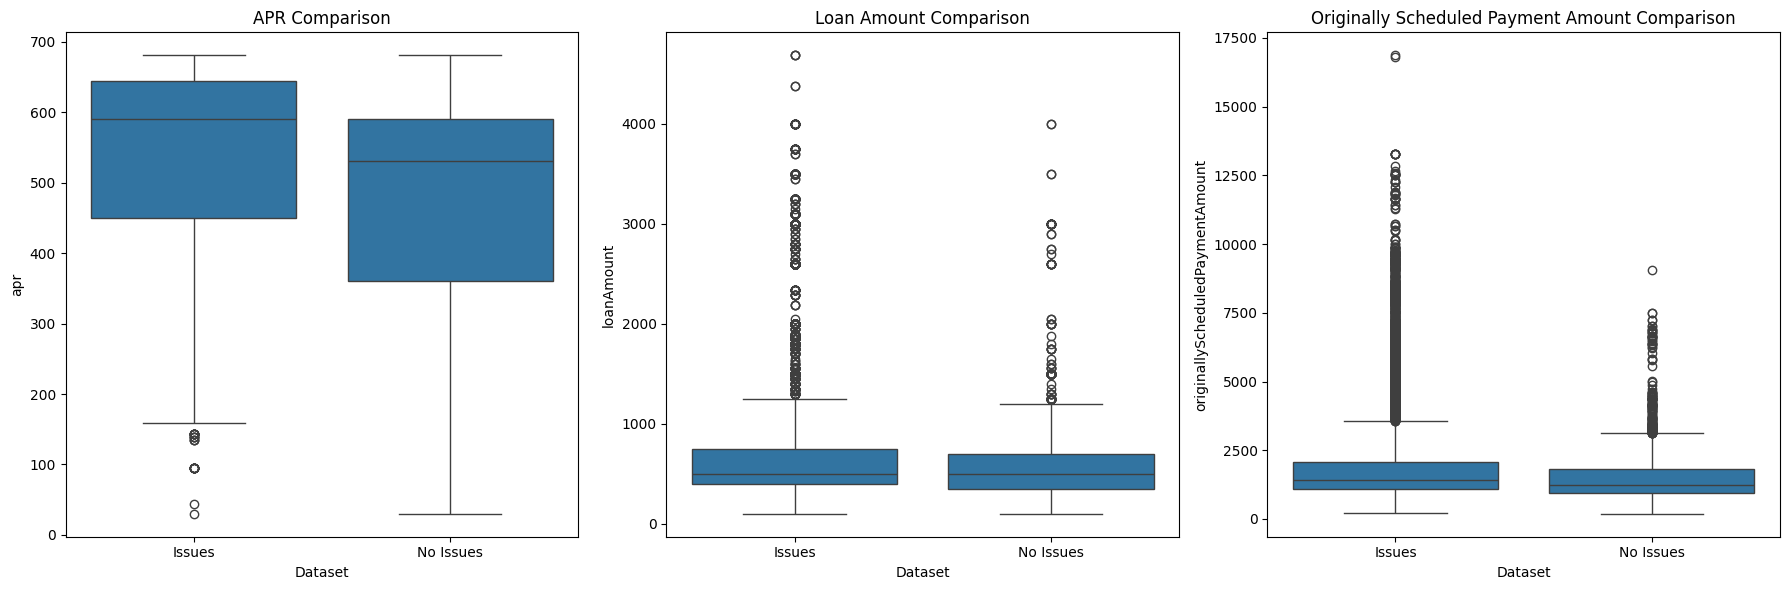

In [45]:
# Add a column to each dataset to allow for easy plotting
merged_with_issue['Dataset'] = 'Issues'
merged_with_no_issue['Dataset'] = 'No Issues'

# Combine the datasets for plotting
combined_data = pd.concat([merged_with_issue, merged_with_no_issue])
plt.figure(figsize=(18, 6))

# Create a boxplot for APR
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.boxplot(x='Dataset', y='apr', data=combined_data)
plt.title('APR Comparison')

# Create a boxplot for Loan Amount
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.boxplot(x='Dataset', y='loanAmount', data=combined_data)
plt.title('Loan Amount Comparison')

# Create a boxplot for Originally Scheduled Payment Amount
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.boxplot(x='Dataset', y='originallyScheduledPaymentAmount', data=combined_data)
plt.title('Originally Scheduled Payment Amount Comparison')

plt.tight_layout()
plt.show()


Although through a glance we can't see a valid pattern through the APR, usually ones with a lower apr tend to have less issues. Also, it is safe to say that any loan with more than an amount of 1000 tend to have issues. And the sheduled amount of over 4000 will also tend to have more issues. 

A client who asks for a higher loan tends to be risker, and a higher number of maxnumberofssnswithanybankaccount might also result in a riskier customer. 

Although it is still a bit hard to accurately tell with the current data provided, we can roughly guess the behavior of a client if the amounts are too large or too little. We can improve the accuracy of the data through various means. A few examples would be as of below:

1. Credit history - we can improve our data by having ones credits scores to understand ones credit card usage, history of loan repayments, and delinquencies. A high credit usage might result in a lower loan repayment rate, which can 
2. Income details - We should need to know if a client has higher income or lower income. If they are planning to start a business or do they want to spend it on gambling. This can drastically improve our chances of hitting a high quality customer and lower the risks we take.
3. Savings and investments - Knowing if a client has any savings in their accounts or having any investments is also a determining factor towards lowering the risks we take in funding a loan. 
4. Educational background - We should know if a client is currently pursuing an education, or if they do not have an educational background. These factors can determine if a client has income or will have income in the future. 